<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
        
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gustavo Adrián Herrera Barragán, Luis Jorge Ahumada Cerda & Santiago Cataño Besson

**Fecha:** 30 de marzo del 2023.

**Expedientes** : 734546, XXXXXX & XXXXXX
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/adrianhb01/Proyecto_Tema_2_Equipo_8.git

# Proyecto TEMA-2

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que utilice datos reales, ya sea de una empresa física real o de alguna página de internet que proporcione bases de datos confiables. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

### Diagrama:

In [5]:
Image(filename = "Diagrama.jpeg")

NameError: name 'Image' is not defined

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.


### 1.1 "Predicción de marcadores en partidos de fútbol".


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - El objetivo general de este proyecto es desarrollar un modelo capaz de predecir el resultado de un partido de fútbol, basado en datos históricos y actuales del equipo.
> #### 1.2 Objetivos específicos
>  - Recopilar y limpiar los datos necesarios para el modelo.
>  - Realizar un análisis exploratorio de los datos para identificar patrones y tendencias.
>  - Identificar las variables más importantes para predecir el resultado de un partido.
>  - Evaluar el rendimiento del modelo utilizando diferentes métricas de evaluación.
>  - Implementar el modelo en una aplicación web para permitir a los usuarios predecir el resultado de los partidos.

### 1.3 Definición del problema.
> 
El escenario de negocio que se va a modelar es el de un sitio web de apuestas deportivas en línea, el cual ofrece a los usuarios la posibilidad de realizar apuestas en partidos de fútbol. El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático que permita predecir el resultado de los partidos y, de esta manera, mejorar la precisión de las apuestas.



### 1.4 Nodos y variables que se decidieron simular y porqué

> Nodos o escenarios a simular:

* 1. Datos históricos y actuales de los equipos, incluyendo su rendimiento, resultados anteriores y estadísticas de jugadores.
* 2. Factores relevantes como la posición en la tabla de posiciones, el rendimiento en casa o fuera de casa, y las lesiones de jugadores clave.
* 3. Modelo de aprendizaje automático para predecir el resultado del partido.
* 4. Evaluación del modelo y ajuste de parámetros.

### 1.5 Definición de hipótesis y supuestos.
>  Hipótesis:

* El rendimiento de un equipo en los partidos anteriores es un buen predictor de su rendimiento en el partido actual.

* Los factores externos, como las condiciones climáticas, tienen un impacto limitado en el resultado del partido.

* La posición en la tabla de posiciones de un equipo es un buen indicador de su capacidad para ganar el partido.

> supuestos:
* Los datos históricos y actuales del equipo son precisos y fiables.
* Los equipos mantienen una consistencia en su desempeño durante la temporada.
* Los jugadores clave de los equipos están disponibles para jugar en el partido.



### 1.6 Obtención de bases de datos
> Los datos los obtenimos de la página Kaggle.


#### Preguntas 
¿Cuáles son los datos que mas nos pueden funcionar a acercarnos a acertar?
¿Tenemos que ser todavia mas especificos o se puede generalizar hacia el partido que sea?
¿Cúales pasos son primero y cuales van despues, como ajusto los de la clase aqui, para lograr una modelacion correcta 
¿Los modelos vistos funcionan solo para 1 variable o como es que se adaptan a un conjunto?

In [ ]:
# librerias 
import numpy as np
import scipy.stats as st     # Librería estadística
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import pandas as pd
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
import time
from scipy import optimize
import seaborn as sns

In [ ]:
#importacion de datos
df1 = pd.read_csv('European Football Season 2022:23/table_premier-league_2022-23.csv')
df1

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

<AxesSubplot:ylabel='Density'>

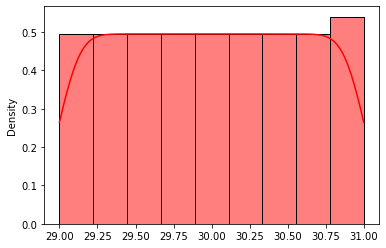

In [23]:
data= df1
sns.histplot(data=x, stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=9)

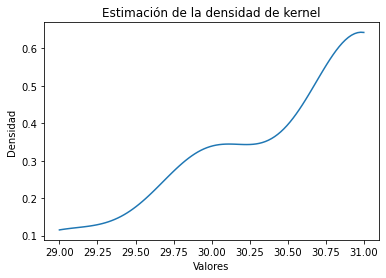

In [20]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Generar datos de ejemplo
datos = df1['PL']

# Calcular la densidad de kernel
densidad = gaussian_kde(datos)

# Generar una serie de valores para evaluar la densidad de kernel
x = np.linspace(datos.min(), datos.max(), 100)

# Calcular los valores de la densidad de kernel en cada punto de x
y = densidad(x)

# Graficar la densidad de kernel
plt.plot(x, y)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Estimación de la densidad de kernel")
plt.show()


In [26]:
#importacion de datos
df2 = pd.read_csv('Football Data from Transfermarkt/competitions.csv')
df2.head()

,competition_id,competition_code,name,type,sub_type,country_id,country_name,country_latitude,country_longitude,domestic_league_code,confederation,url
0,L1,bundesliga,Bundesliga,domestic_league,first_tier,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/bundesliga/sta...
1,DFB,dfb-pokal,Dfb Pokal,domestic_cup,domestic_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfb-pokal/star...
2,DFL,dfl-supercup,Dfl Supercup,other,domestic_super_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfl-supercup/s...
3,NL1,eredivisie,Eredivisie,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
4,NLP,toto-knvb-beker,Toto Knvb Beker,domestic_cup,domestic_cup,122,Netherlands,52.243498,5.634323,NL1,europa,https://www.transfermarkt.co.uk/toto-knvb-beke...


ConversionError: Failed to convert value(s) to axis units: array(['Germany', 'Germany', 'Germany', 'Netherlands', 'Netherlands',
       'Netherlands', 'Belgium', 'Belgium', 'Spain', 'Spain', 'Spain',
       'Portugal', 'Portugal', 'Portugal', 'France', 'France', 'England',
       'England', 'England', 'England', 'Russia', 'Russia', 'Russia',
       'Ukraine', 'Ukraine', 'Ukraine', 'Scotland', 'Scotland', 'Italy',
       'Italy', 'Italy', 'Greece', 'Greece', 'Turkey', 'Denmark',
       'Denmark', nan, nan, nan, nan, nan, nan, nan], dtype=object)

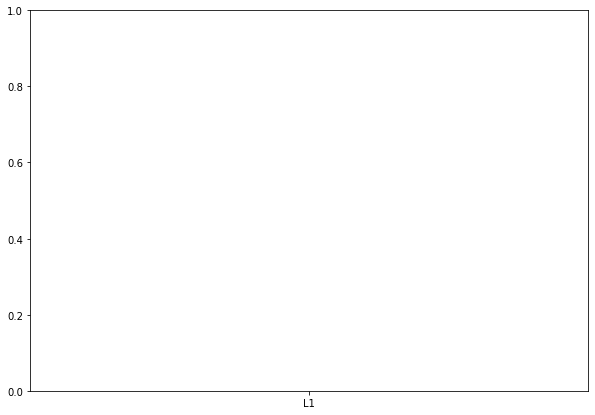

In [25]:
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(df2[''], bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(hd)
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

In [12]:
#importacion de datos
df3 = pd.read_csv('International football results from 1872 to 2022/results.csv')
df3

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


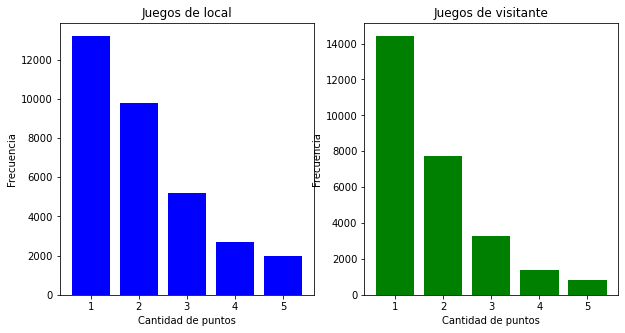

In [31]:
import matplotlib.pyplot as plt

# Generar datos de ejemplo
home = df3['home_score']
away = df3['away_score']

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Graficar el histograma de los juegos de local en el primer subgráfico
axs[0].hist(home, bins=range(1, 7), align='left', rwidth=0.8, color='blue')
axs[0].set_xlabel('Cantidad de puntos')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Juegos de local')

# Graficar el histograma de los juegos de visitante en el segundo subgráfico
axs[1].hist(away, bins=range(1, 7), align='left', rwidth=0.8, color='green')
axs[1].set_xlabel('Cantidad de puntos')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Juegos de visitante')

# Mostrar la figura
plt.show()


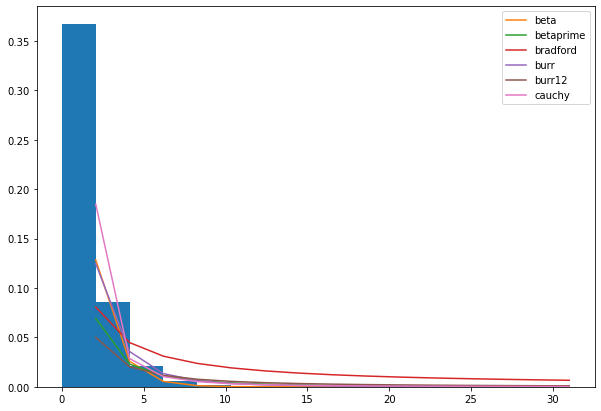

,distribución,error
0,beta,0.00405
1,betaprime,0.00617
2,bradford,0.005685
3,burr,0.004081
4,burr12,0.006982
5,cauchy,0.002435


In [28]:
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(df3['home_score'], bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(df3['home_score'])
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

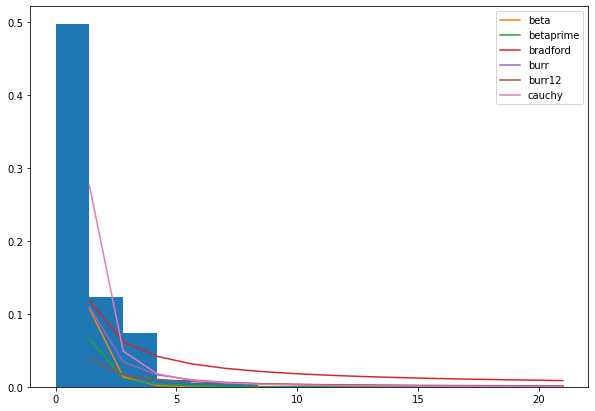

,distribución,error
0,beta,0.011305
1,betaprime,0.013587
2,bradford,0.010084
3,burr,0.010793
4,burr12,0.01508
5,cauchy,0.003834


In [29]:
continuous_dist = [dist_i for dist_i in dir(st) if isinstance(getattr(st, dist_i), getattr(st, 'rv_continuous'))] 

fig, ax = plt.subplots(1,1, figsize = (10,7))

y, x, _ = ax.hist(df3['away_score'], bins = 15, density = True)
x = x[1:]
i = 0

error_df = pd.DataFrame(columns = ['distribución', 'error'])
for d in continuous_dist[4:10]:
    param = getattr(st,d).fit(df3['away_score'])
    y_hat = getattr(st, d).pdf(x, *param)
    error = np.mean((y - y_hat)**2)
    error_df.loc[i, 'distribución'] = d
    error_df.loc[i, 'error'] = error
    i+=1
    ax.plot(x, y_hat,label = f'{d}')
plt.legend()
plt.show()

error_df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


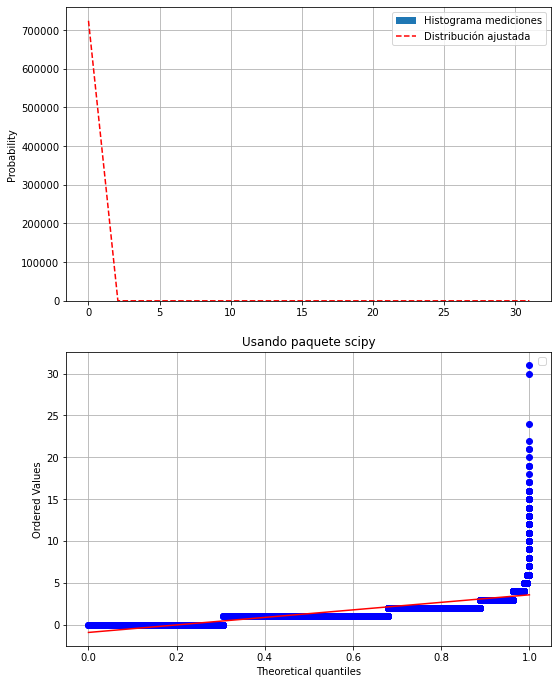

In [33]:
divisiones = 15
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(home, divisiones, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(home)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(home, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>